In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')
from nltk import word_tokenize
import sys
from sklearn.metrics import confusion_matrix,classification_report
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

[nltk_data] Downloading package punkt to C:\Users\Windows
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data=pd.read_csv('new_data.csv')

In [3]:
pd.value_counts(data['label'])

 1    139
-1    135
Name: label, dtype: int64

In [4]:
data['sentimen'] = data['label']
data['sentimen'].replace({1: 'positif', -1:'negatif'}, inplace=True)

In [5]:
data.head()

,Unnamed: 0,user_id,created_at,text,label,tweet_tokens,tweet_tokens_fdist,tweet_tokens_WSW,tweet_normalized,tweet_tokens_stemmed,sentimen
0,0,1.380000e+18,3/29/2021,bsatgas covid mengaku kepatuhan masyarakat ter...,-1,"['bsatgas', 'covid', 'mengaku', 'kepatuhan', '...",<FreqDist with 13 samples and 13 outcomes>,"['bsatgas', 'covid', 'mengaku', 'kepatuhan', '...","['satgas', 'covid', 'mengaku', 'kepatuhan', 'm...","['satgas', 'covid', 'aku', 'patuh', 'masyaraka...",negatif
1,1,1.380000e+18,3/29/2021,brt hari ini saya akan bahas soal long covid y...,1,"['brt', 'hari', 'ini', 'saya', 'akan', 'bahas'...",<FreqDist with 20 samples and 20 outcomes>,"['bahas', 'long', 'covid', 'sebutannya', 'diga...","['bahas', 'long', 'covid', 'sebutannya', 'diga...","['bahas', 'long', 'covid', 'sebut', 'ganti', '...",positif
2,2,1.380000e+18,3/29/2021,agak aneh gk sih kalo alasannya korona,-1,"['agak', 'aneh', 'gk', 'sih', 'kalo', 'alasann...",<FreqDist with 7 samples and 7 outcomes>,"['aneh', 'alasannya', 'korona']","['aneh', 'alasannya', 'korona']","['aneh', 'alas', 'korona']",negatif
3,3,1.380000e+18,3/29/2021,brt data kematian covid sampai maret,-1,"['brt', 'data', 'kematian', 'covid', 'sampai',...",<FreqDist with 6 samples and 6 outcomes>,"['data', 'kematian', 'covid', 'maret']","['data', 'kematian', 'covid', 'maret']","['data', 'mati', 'covid', 'maret']",negatif
4,4,1.380000e+18,3/29/2021,bterapkan pendisiplinan prokes guna antisipasi...,1,"['bterapkan', 'pendisiplinan', 'prokes', 'guna...",<FreqDist with 14 samples and 14 outcomes>,"['bterapkan', 'pendisiplinan', 'prokes', 'anti...","['terapkan', 'pendisiplinan', 'prokes', 'antis...","['terap', 'disiplin', 'prokes', 'antisipasi', ...",positif


In [6]:
data['label'].value_counts()

 1    139
-1    135
Name: label, dtype: int64

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
X = data['tweet_tokens_stemmed']
y = data['label']
#cv = CountVectorizer()
#cou_vec = cv.fit_transform(X)
tfidf = TfidfVectorizer()
corps = tfidf.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corps,y, test_size=0.2, random_state=42)

In [9]:
from sklearn.svm import SVC
svm = SVC()
svm = svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))

0.7636363636363637


In [11]:
cm_test =confusion_matrix(y_pred,y_test)

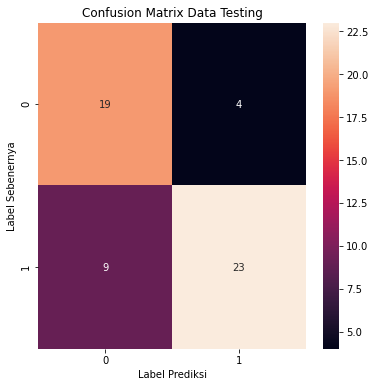

In [12]:
import seaborn as sns
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix Data Testing')
sns.heatmap(cm_test,annot=True,fmt='d')
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenernya')
plt.show()

In [13]:
cr_train=classification_report(y_pred,y_test)
print(cr_train)

              precision    recall  f1-score   support

          -1       0.68      0.83      0.75        23
           1       0.85      0.72      0.78        32

    accuracy                           0.76        55
   macro avg       0.77      0.77      0.76        55
weighted avg       0.78      0.76      0.77        55



In [14]:
def prediksi(teks):
    kalimat=tfidf.transform([teks])
    pred=svm.predict(kalimat)
    if pred == 1:
        sentimen = 'positif'
    else:
        sentimen ='negatif'
    return sentimen

In [22]:
prediksi('jumlah pasien positif bertambah')

'negatif'

In [23]:
prediksi('kasihan masyarakat miskin')

'negatif'

In [24]:
prediksi('pemerintah segera melakukan perbaikan ekonomi')

'positif'